In [3]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from functools import partial
import unicodedata 
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r"D:\tesis_u_sabana\data\secop_2_adiciones_1.csv", sep="~")
df.head(5)

identificador         id_contrato                  tipo  \
0   CO1.CTRMOD.499720   CO1.PCCNTR.285227  MODIFICACION GENERAL   
1  CO1.CTRMOD.5061177  CO1.PCCNTR.1422827   ADICION EN EL VALOR   
2  CO1.CTRMOD.5570045  CO1.PCCNTR.2134579  MODIFICACION GENERAL   
3  CO1.CTRMOD.6535005  CO1.PCCNTR.1300151            CONCLUSION   
4  CO1.CTRMOD.1762616   CO1.PCCNTR.812762   ADICION EN EL VALOR   

                                         descripcion fecharegistro  
0  ADICIONAR EL VALOR DEL CONTRATO DE PRESTACIoN ...    09/01/2018  
1  C.QUE DE ACUERDO AL OFICIO DEL 26 DE OCTUBRE D...    01/01/2020  
2  CONSIDERANDO: 1) QUE LA SUBRED INTEGRADA DE SE...    02/01/2021  
3  DE CONFORMIDAD CON LA CIRCULAR 00006-2020- LIN...    08/01/2021  
4  MODIFICACIoN  ADICIoN Y PRoRROGA NRO. 1 AL CO...    01/01/2019

In [5]:
# Definir las funciones

def eliminar_tildes(texto):
    if not isinstance(texto, str):  # Manejo de valores no str
        return texto
    texto_normalizado = unicodedata.normalize('NFKD', texto)
    texto_sin_tildes = ''.join([c for c in texto_normalizado if not unicodedata.combining(c)])
    return texto_sin_tildes

def lower_1(bagtoprocess):
    if not isinstance(bagtoprocess, str):  # Manejo de valores no str
        return bagtoprocess
    return bagtoprocess.lower()

def limpiar_inicial_dataframe(df):
    return df.map(lambda x: lower_1(eliminar_tildes(x)) if isinstance(x, str) else x)

df = limpiar_inicial_dataframe(df)

In [6]:
tokenizer = RegexpTokenizer(r'\w+')

In [7]:
spanish_stopwords = set(stopwords.words('spanish'))
english_stopwords = set(stopwords.words('english'))
other_stopwords = set(["he" , "mas", "si","ser","aunque","hace","tan","solo",
                       "tambien","vez","parece","va","da","hacer","asi","haber",
                       "pues","ver","etc","contrato","servicios","prestacion",
                       "mediante","cuenta","fecha","presente","acuerdo","necesario","contratista",
                        "mil","servicio","requiere","contratos", "supervisor","cumplimiento","modificar",
                        "dar","realizar","objeto","contractual","pesos","modificacion",
                        "conforme","contratacion","gestion","entidad","apoyo","ejecucion",
                        "vigente","normatividad","acta"])
stopword_set = spanish_stopwords.union(english_stopwords,other_stopwords)

In [8]:
def extract_reviews(bagtoprocess):
    if not isinstance(bagtoprocess, str):  # Manejo de valores no str
        return ""
    return bagtoprocess.lower()

def checkif_stopword(word, stopwords):
    return word not in stopwords

def filter_stopwords(tokens, stopwords):
    return list(filter(partial(checkif_stopword, stopwords=stopwords), tokens))

def eliminar_tildes(texto):
    if not isinstance(texto, str):  # Manejo de valores no str
        return ""
    texto_normalizado = unicodedata.normalize('NFKD', texto)
    texto_sin_tildes = ''.join([c for c in texto_normalizado if not unicodedata.combining(c)])
    return texto_sin_tildes

def eliminar_numeros(texto):
    if not isinstance(texto, str):  # Manejo de valores no str
        return ""
    return ''.join([c for c in texto if not c.isdigit()])

In [9]:
df['descripcion'] = df['descripcion'].astype(str)  # Asegurar que todo es string
df['descripcion_sin_tildes'] = df['descripcion'].apply(eliminar_tildes)
df['descripcion_minusculas'] = df['descripcion_sin_tildes'].apply(extract_reviews)
df['descripcion_sin_numeros'] = df['descripcion_minusculas'].apply(eliminar_numeros)
df['descripcion_tokens'] = df['descripcion_sin_numeros'].apply(tokenizer.tokenize)
df['descripcion_limpio'] = df['descripcion_tokens'].apply(partial(filter_stopwords, stopwords=stopword_set))


df['tipo'] = df['tipo'].astype(str)  # Asegurar que todo es string
df['tipo_s_t'] = df['tipo'].apply(eliminar_tildes)
df['tipo_mins'] = df['tipo_s_t'].apply(extract_reviews)

df.head()

identificador         id_contrato                  tipo  \
0   co1.ctrmod.499720   co1.pccntr.285227  modificacion general   
1  co1.ctrmod.5061177  co1.pccntr.1422827   adicion en el valor   
2  co1.ctrmod.5570045  co1.pccntr.2134579  modificacion general   
3  co1.ctrmod.6535005  co1.pccntr.1300151            conclusion   
4  co1.ctrmod.1762616   co1.pccntr.812762   adicion en el valor   

                                         descripcion fecharegistro  \
0  adicionar el valor del contrato de prestacion ...    09/01/2018   
1  c.que de acuerdo al oficio del 26 de octubre d...    01/01/2020   
2  considerando: 1) que la subred integrada de se...    02/01/2021   
3  de conformidad con la circular 00006-2020- lin...    08/01/2021   
4  modificacion  adicion y prorroga nro. 1 al co...    01/01/2019   

                              descripcion_sin_tildes  \
0  adicionar el valor del contrato de prestacion ...   
1  c.que de acuerdo al oficio del 26 de octubre d...   
2  considerando: 1) que la subred integrada de se...   
3  de conformidad con la circular 00006-2020- lin...   
4  modificacion  adicion y prorroga nro. 1 al co...   

                              descripcion_minusculas  \
0  adicionar el valor del contrato de prestacion ...   
1  c.que de acuerdo al oficio del 26 de octubre d...   
2  considerando: 1) que la subred integrada de se...   
3  de conformidad con la circular 00006-2020- lin...   
4  modificacion  adicion y prorroga nro. 1 al co...   

                             descripcion_sin_numeros  \
0  adicionar el valor del contrato de prestacion ...   
1  c.que de acuerdo al oficio del  de octubre de ...   
2  considerando: ) que la subred integrada de ser...   
3  de conformidad con la circular -- lineamientos...   
4  modificacion  adicion y prorroga nro.  al con...   

                                  descripcion_tokens  \
0  [adicionar, el, valor, del, contrato, de, pres...   
1  [c, que, de, acuerdo, al, oficio, del, de, oct...   
2  [considerando, que, la, subred, integrada, de,...   
3  [de, conformidad, con, la, circular, lineamien...   
4  [modificacion, adicion, y, prorroga, nro, al, ...   

                                  descripcion_limpio              tipo_s_t  \
0  [adicionar, valor, profesionales, n, suma, qui...  modificacion general   
1  [c, oficio, octubre, profesional, universitari...   adicion en el valor   
2  [considerando, subred, integrada, salud, sur, ...  modificacion general   
3  [conformidad, circular, lineamientos, secop, i...            conclusion   
4  [adicion, prorroga, nro, profesionales, celebr...   adicion en el valor   

              tipo_mins  
0  modificacion general  
1   adicion en el valor  
2  modificacion general  
3            conclusion  
4   adicion en el valor

In [10]:
def get_top_n_words(corpus, n=1, k=1, stop_words=None):
   vec = CountVectorizer(ngram_range=(k, k), stop_words=stop_words)
   bag_of_words = vec.fit_transform(corpus)
   sum_words = bag_of_words.sum(axis=0) 
   words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
   words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
   return words_freq[:n]

common_words = get_top_n_words(df['descripcion_limpio'].apply(lambda x: ' '.join(x)), 20, 1, stop_words=list(stopword_set))

prorroga 853318
adicion 836692
cierre 758343
plazo 746087
terminacion 688365
valor 631576
profesionales 547327
liquidacion 516302
colombia 510508
solicitud 502977
documentos 495092
adicionar 494957
expediente 492023
necesidad 489632
compra 487057
eficiente 484590
descripcion 466315
procede 455221
lineamientos 454363
salud 437356


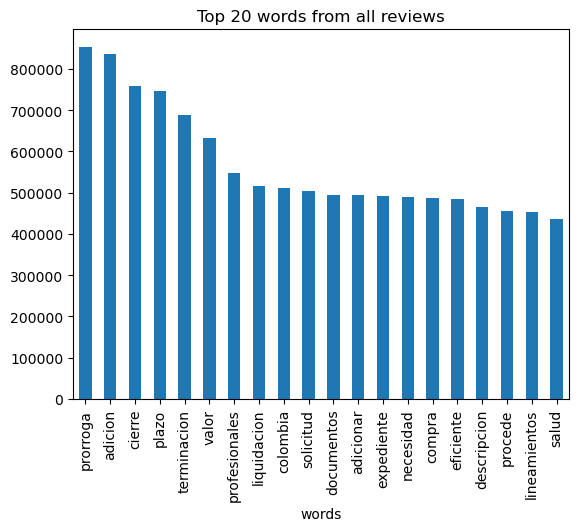

In [11]:
for word, freq in common_words:
    print(word, freq)
    
df_top_words = pd.DataFrame(common_words, columns=["words", "count"])
df_top_words.groupby("words").sum()["count"].sort_values(ascending=False).plot(
    kind="bar", title="Top 20 words from all reviews"
)
plt.show()

In [12]:
df= df[['identificador', 'id_contrato', 'tipo_mins', 'descripcion', 'fecharegistro','descripcion_limpio']]
df.head()

identificador         id_contrato             tipo_mins  \
0   co1.ctrmod.499720   co1.pccntr.285227  modificacion general   
1  co1.ctrmod.5061177  co1.pccntr.1422827   adicion en el valor   
2  co1.ctrmod.5570045  co1.pccntr.2134579  modificacion general   
3  co1.ctrmod.6535005  co1.pccntr.1300151            conclusion   
4  co1.ctrmod.1762616   co1.pccntr.812762   adicion en el valor   

                                         descripcion fecharegistro  \
0  adicionar el valor del contrato de prestacion ...    09/01/2018   
1  c.que de acuerdo al oficio del 26 de octubre d...    01/01/2020   
2  considerando: 1) que la subred integrada de se...    02/01/2021   
3  de conformidad con la circular 00006-2020- lin...    08/01/2021   
4  modificacion  adicion y prorroga nro. 1 al co...    01/01/2019   

                                  descripcion_limpio  
0  [adicionar, valor, profesionales, n, suma, qui...  
1  [c, oficio, octubre, profesional, universitari...  
2  [considerando, subred, integrada, salud, sur, ...  
3  [conformidad, circular, lineamientos, secop, i...  
4  [adicion, prorroga, nro, profesionales, celebr...

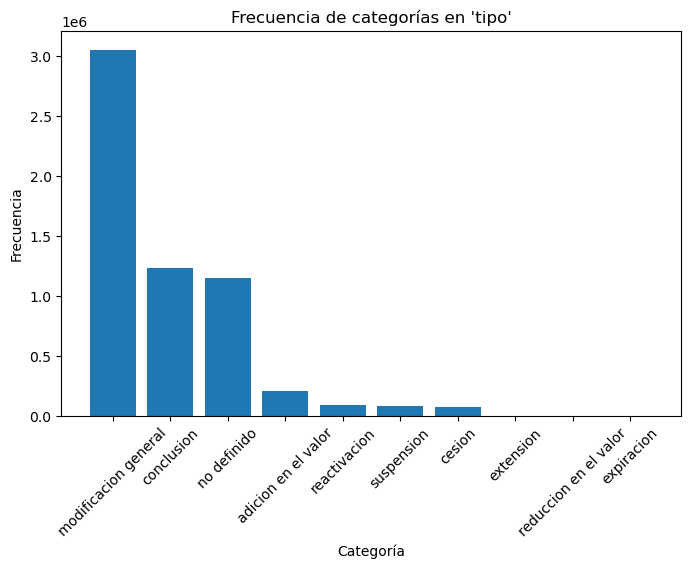

In [13]:

# Contar la frecuencia de cada categoría en la columna "tipo"
tipo_counts = df["tipo_mins"].value_counts()

plt.figure(figsize=(8, 5))
plt.bar(tipo_counts.index, tipo_counts.values)
plt.xlabel("Categoría")
plt.ylabel("Frecuencia")
plt.title("Frecuencia de categorías en 'tipo'")
plt.xticks(rotation=45)
plt.show()

In [14]:
tipo_counts 

tipo_mins
modificacion general     3056007
conclusion               1231524
no definido              1155024
adicion en el valor       213462
reactivacion               94773
suspension                 83248
cesion                     76755
extension                    380
reduccion en el valor        143
expiracion                     1
Name: count, dtype: int64

In [15]:
df = df[df["tipo_mins"].isin(["adicion en el valor", "modificacion general","suspension"])]

df.head()

identificador         id_contrato             tipo_mins  \
0   co1.ctrmod.499720   co1.pccntr.285227  modificacion general   
1  co1.ctrmod.5061177  co1.pccntr.1422827   adicion en el valor   
2  co1.ctrmod.5570045  co1.pccntr.2134579  modificacion general   
4  co1.ctrmod.1762616   co1.pccntr.812762   adicion en el valor   
5  co1.ctrmod.5593802  co1.pccntr.1676523  modificacion general   

                                         descripcion fecharegistro  \
0  adicionar el valor del contrato de prestacion ...    09/01/2018   
1  c.que de acuerdo al oficio del 26 de octubre d...    01/01/2020   
2  considerando: 1) que la subred integrada de se...    02/01/2021   
4  modificacion  adicion y prorroga nro. 1 al co...    01/01/2019   
5  la subred integrada de servicios de salud sur...    02/01/2021   

                                  descripcion_limpio  
0  [adicionar, valor, profesionales, n, suma, qui...  
1  [c, oficio, octubre, profesional, universitari...  
2  [considerando, subred, integrada, salud, sur, ...  
4  [adicion, prorroga, nro, profesionales, celebr...  
5  [subred, integrada, salud, sur, occidente, nut...

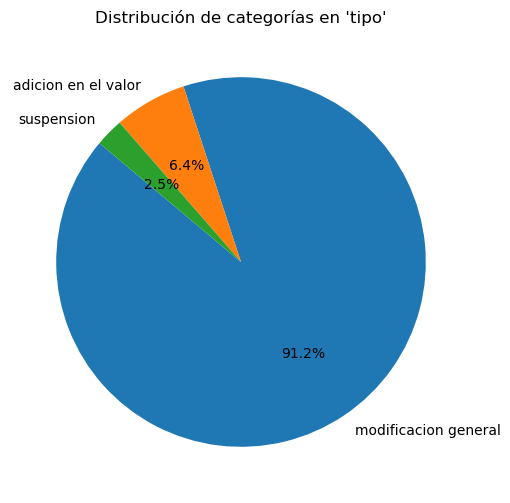

In [16]:
# Gráfico de pastel (pie chart)
tipo_counts = df["tipo_mins"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(tipo_counts, labels=tipo_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Distribución de categorías en 'tipo'")
plt.show()

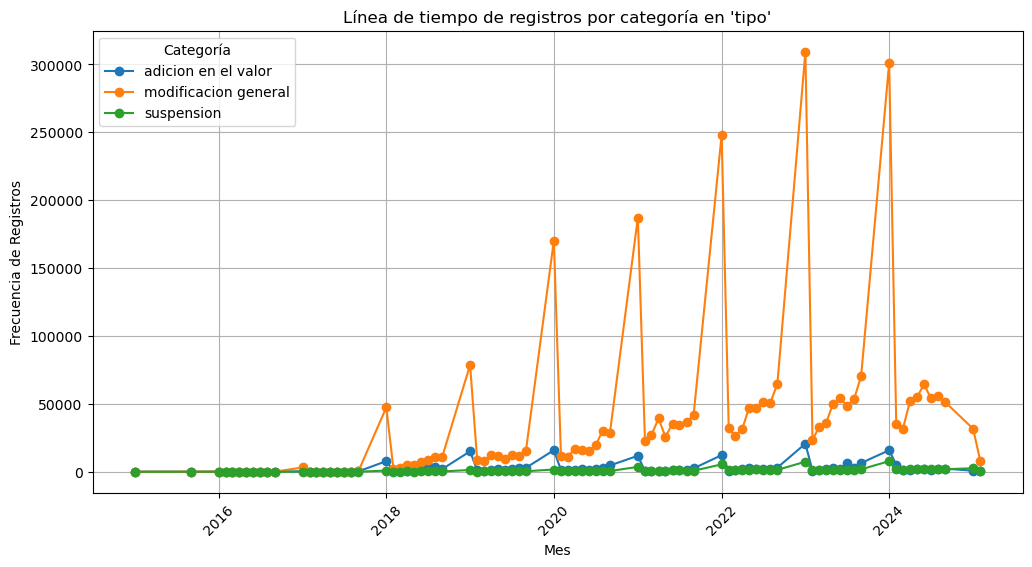

In [17]:
# Asegurar que la columna 'fecharegistro' es de tipo datetime
df["fecharegistro"] = pd.to_datetime(df["fecharegistro"])

# Extraer el año y el mes
df["mes"] = df["fecharegistro"].dt.to_period("M")

# Agrupar por categoría y mes, y contar los registros
df_grouped = df.groupby(["mes", "tipo_mins"]).size().unstack(fill_value=0)

# Convertir el índice a formato datetime para graficar correctamente
df_grouped.index = df_grouped.index.to_timestamp()

# Graficar cada categoría con una línea diferente
plt.figure(figsize=(12, 6))

for categoria in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[categoria], marker='o', linestyle='-', label=categoria)

plt.xlabel("Mes")
plt.ylabel("Frecuencia de Registros")
plt.title("Línea de tiempo de registros por categoría en 'tipo'")
plt.xticks(rotation=45)
plt.legend(title="Categoría")
plt.grid(True)
plt.show()


In [18]:
df.to_csv(r"D:\tesis_u_sabana\data\secop_2_adiciones_1_clean.csv", sep="~", index=False)